In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# File paths (adjust the paths as per your local data folder)
cdc_data_path = "../data/cdc_data.csv"
chicago_data_path = "../data/chicago_building_permits.csv"

# Load CDC and Chicago datasets
cdc_data = pd.read_csv(cdc_data_path)
chicago_data = pd.read_csv(chicago_data_path)

cdc_data = cdc_data[~cdc_data["Age Group"].isin(["All Ages", "Not stated"])]
chicago_data = chicago_data[chicago_data["Age Group"] != "All"]

# Preprocess CDC Data
cdc_data_cleaned = cdc_data[["Age Group", "COVID-19 Deaths", "Number of Mentions"]].dropna()
cdc_data_cleaned["Death Rate"] = cdc_data_cleaned["COVID-19 Deaths"] / cdc_data_cleaned["Number of Mentions"]
cdc_agg = cdc_data_cleaned.groupby("Age Group").agg(
    {"COVID-19 Deaths": "sum", "Death Rate": "mean"}
).reset_index()

# Preprocess Chicago Data
chicago_data_cleaned = chicago_data[["Age Group", "Unvaccinated Rate", "Vaccinated Rate", "Boosted Rate"]].dropna()
chicago_agg = chicago_data_cleaned.groupby("Age Group").mean().reset_index()


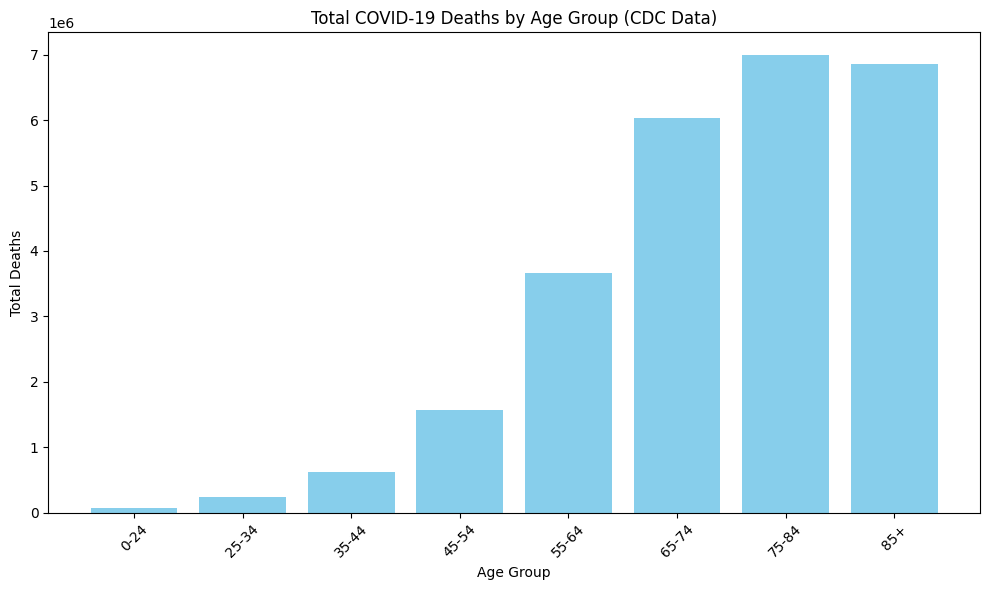

In [3]:

# Visualization 1: Total COVID-19 Deaths by Age Group (CDC Data)
plt.figure(figsize=(10, 6))
plt.bar(cdc_agg["Age Group"], cdc_agg["COVID-19 Deaths"], color="skyblue")
plt.title("Total COVID-19 Deaths by Age Group (CDC Data)")
plt.xlabel("Age Group")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


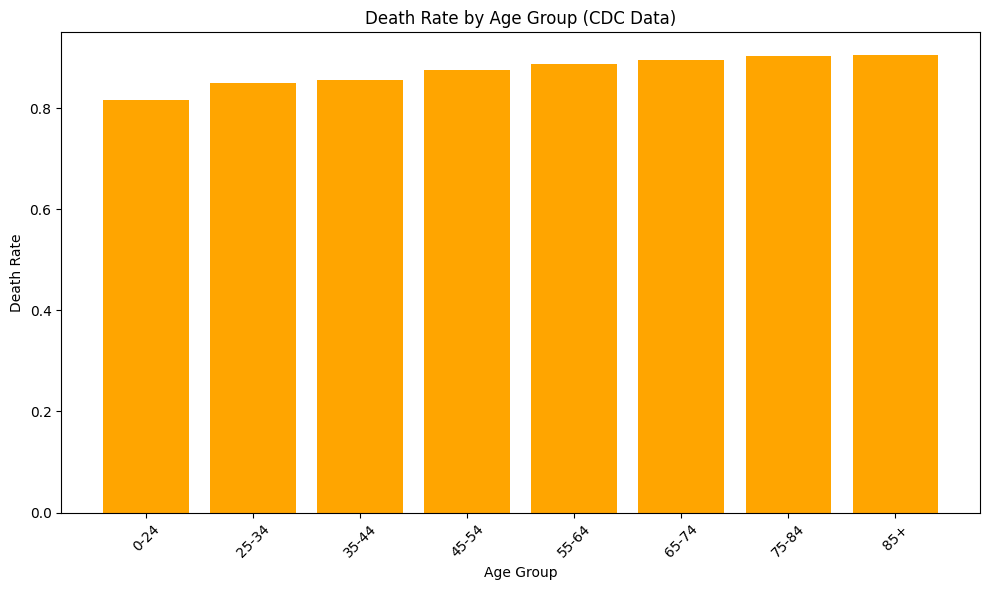

In [4]:

# Visualization 2: Death Rate by Age Group (CDC Data)
plt.figure(figsize=(10, 6))
plt.bar(cdc_agg["Age Group"], cdc_agg["Death Rate"], color="orange")
plt.title("Death Rate by Age Group (CDC Data)")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


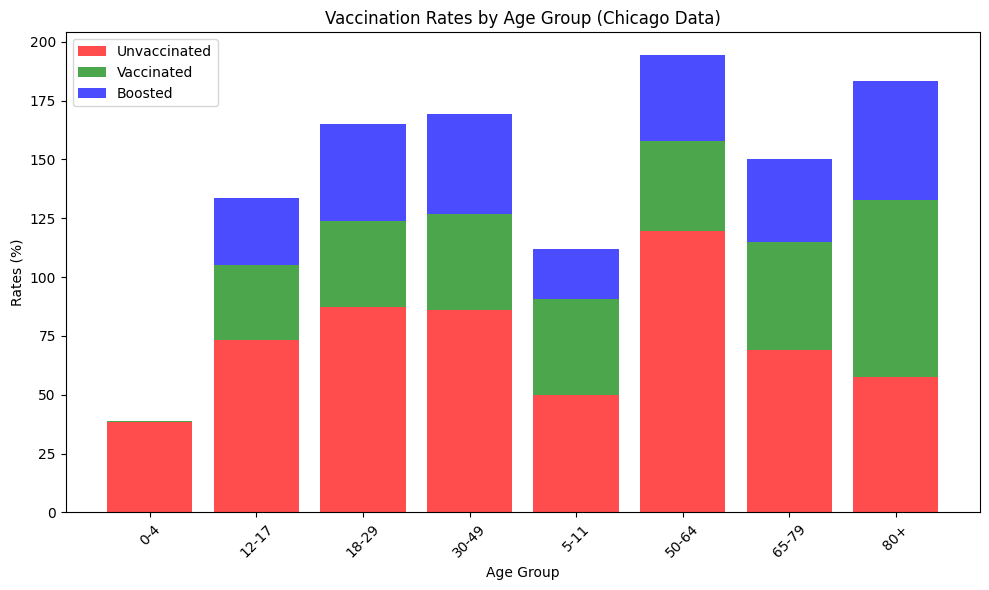

In [5]:

# Visualization 3: Vaccination Rates by Age Group (Chicago Data)
plt.figure(figsize=(10, 6))
x = chicago_agg["Age Group"]
plt.bar(x, chicago_agg["Unvaccinated Rate"], label="Unvaccinated", color="red", alpha=0.7)
plt.bar(
    x,
    chicago_agg["Vaccinated Rate"],
    label="Vaccinated",
    color="green",
    alpha=0.7,
    bottom=chicago_agg["Unvaccinated Rate"],
)
plt.bar(
    x,
    chicago_agg["Boosted Rate"],
    label="Boosted",
    color="blue",
    alpha=0.7,
    bottom=chicago_agg["Unvaccinated Rate"] + chicago_agg["Vaccinated Rate"],
)
plt.title("Vaccination Rates by Age Group (Chicago Data)")
plt.xlabel("Age Group")
plt.ylabel("Rates (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


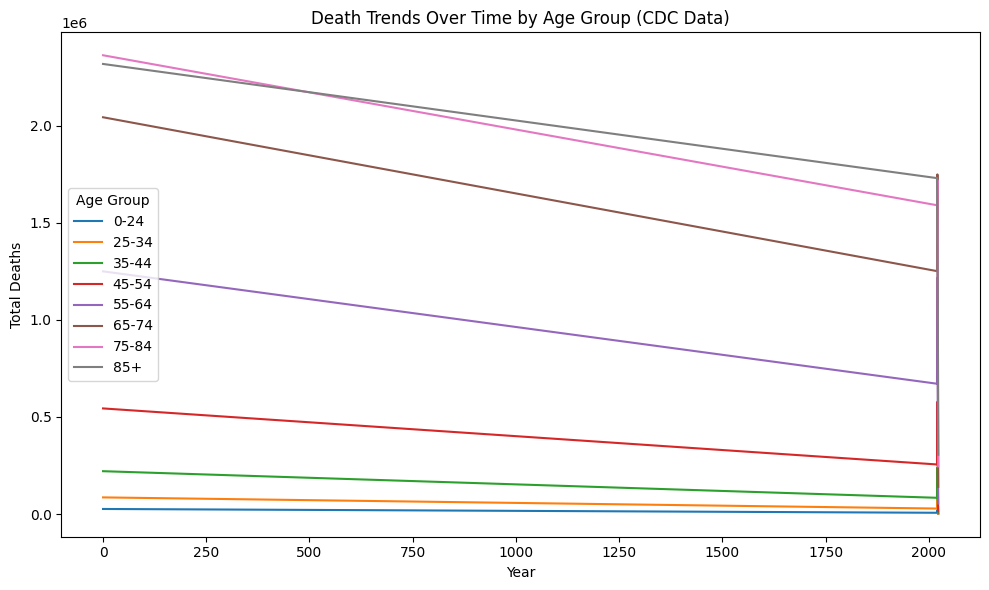

In [6]:

# Visualization 4: Death Trends Over Time by Age Group (CDC Data)
if "Year" in cdc_data.columns:
    cdc_data_time = cdc_data[["Year", "Age Group", "COVID-19 Deaths"]].groupby(["Year", "Age Group"]).sum().reset_index()
    plt.figure(figsize=(10, 6))
    for age_group in cdc_data_time["Age Group"].unique():
        age_group_data = cdc_data_time[cdc_data_time["Age Group"] == age_group]
        plt.plot(
            age_group_data["Year"],
            age_group_data["COVID-19 Deaths"],
            label=age_group,
        )
    plt.title("Death Trends Over Time by Age Group (CDC Data)")
    plt.xlabel("Year")
    plt.ylabel("Total Deaths")
    plt.legend(title="Age Group")
    plt.tight_layout()
    plt.show()


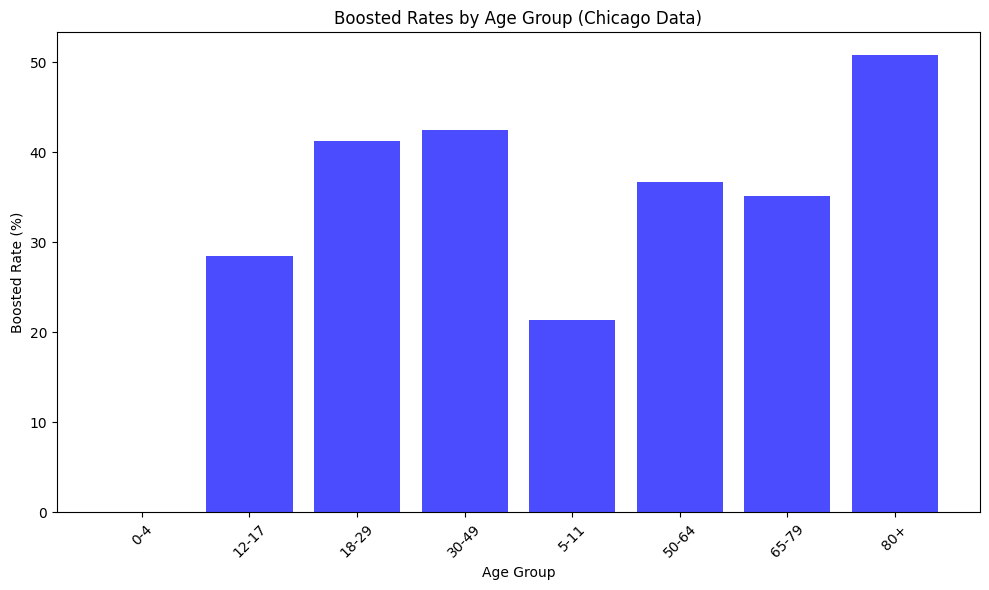

In [7]:

# Visualization 5: Boosted Rates by Age Group (Chicago Data)
plt.figure(figsize=(10, 6))
plt.bar(chicago_agg["Age Group"], chicago_agg["Boosted Rate"], color="blue", alpha=0.7)
plt.title("Boosted Rates by Age Group (Chicago Data)")
plt.xlabel("Age Group")
plt.ylabel("Boosted Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


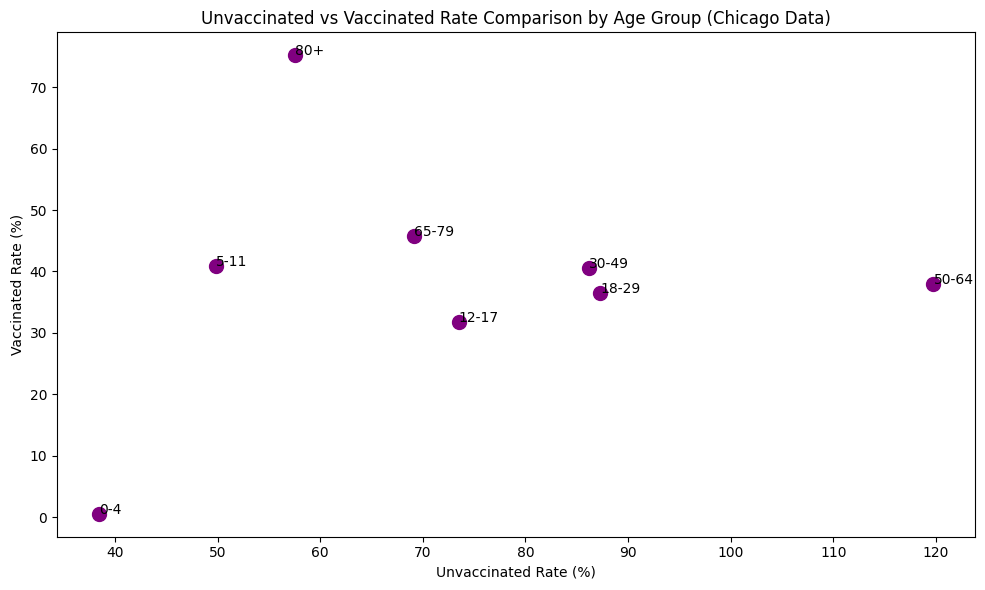

In [8]:

# Visualization 6: Unvaccinated vs Vaccinated Rate Comparison (Chicago Data)
plt.figure(figsize=(10, 6))
plt.scatter(chicago_agg["Unvaccinated Rate"], chicago_agg["Vaccinated Rate"], color="purple", s=100)
for i, txt in enumerate(chicago_agg["Age Group"]):
    plt.annotate(txt, (chicago_agg["Unvaccinated Rate"][i], chicago_agg["Vaccinated Rate"][i]))
plt.title("Unvaccinated vs Vaccinated Rate Comparison by Age Group (Chicago Data)")
plt.xlabel("Unvaccinated Rate (%)")
plt.ylabel("Vaccinated Rate (%)")
plt.tight_layout()
plt.show()


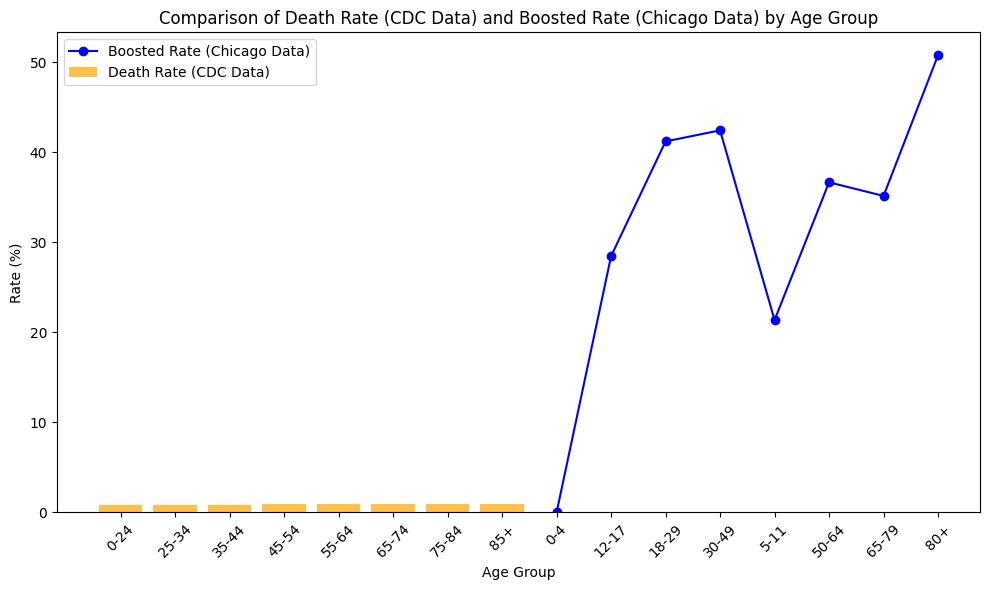

In [9]:

# Visualization 7: Relationship Between Death Rate and Boosted Rate (CDC vs Chicago Data)
cdc_death_rates = cdc_agg[["Age Group", "Death Rate"]]
chicago_boosted_rates = chicago_agg[["Age Group", "Boosted Rate"]]

# Plot both Death Rate and Boosted Rate side by side
plt.figure(figsize=(10, 6))

# Bar plot for Death Rate (CDC Data)
plt.bar(cdc_death_rates["Age Group"], cdc_death_rates["Death Rate"], label="Death Rate (CDC Data)", alpha=0.7, color="orange")

# Line plot for Boosted Rate (Chicago Data)
plt.plot(chicago_boosted_rates["Age Group"], chicago_boosted_rates["Boosted Rate"], label="Boosted Rate (Chicago Data)", marker='o', color="blue")

# Add titles and labels
plt.title("Comparison of Death Rate (CDC Data) and Boosted Rate (Chicago Data) by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Rate (%)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


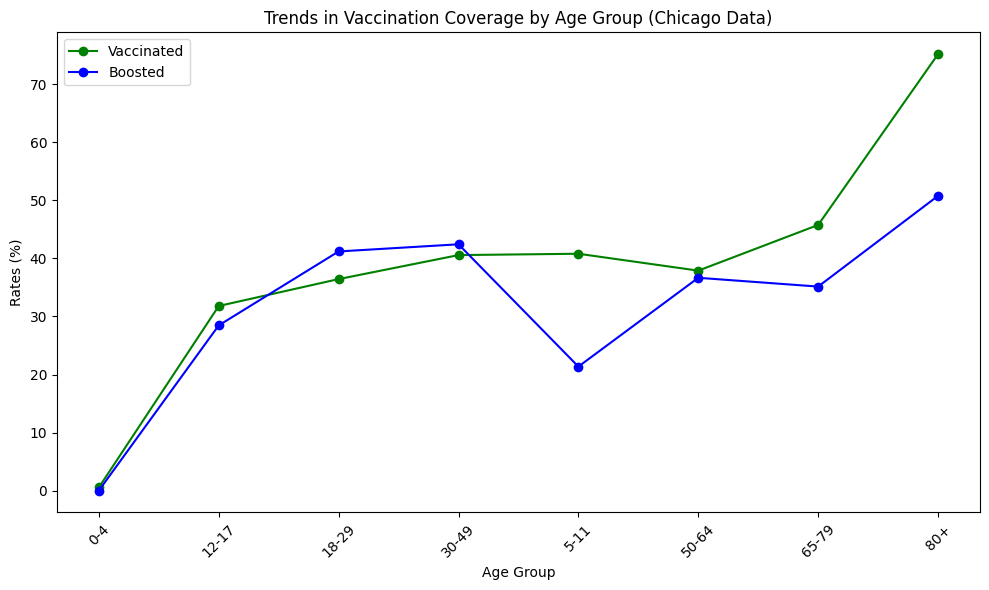

In [10]:

# Visualization 8: Trends in Vaccination Coverage (Chicago Data)
plt.figure(figsize=(10, 6))
plt.plot(chicago_agg["Age Group"], chicago_agg["Vaccinated Rate"], label="Vaccinated", marker="o", color="green")
plt.plot(chicago_agg["Age Group"], chicago_agg["Boosted Rate"], label="Boosted", marker="o", color="blue")
plt.title("Trends in Vaccination Coverage by Age Group (Chicago Data)")
plt.xlabel("Age Group")
plt.ylabel("Rates (%)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


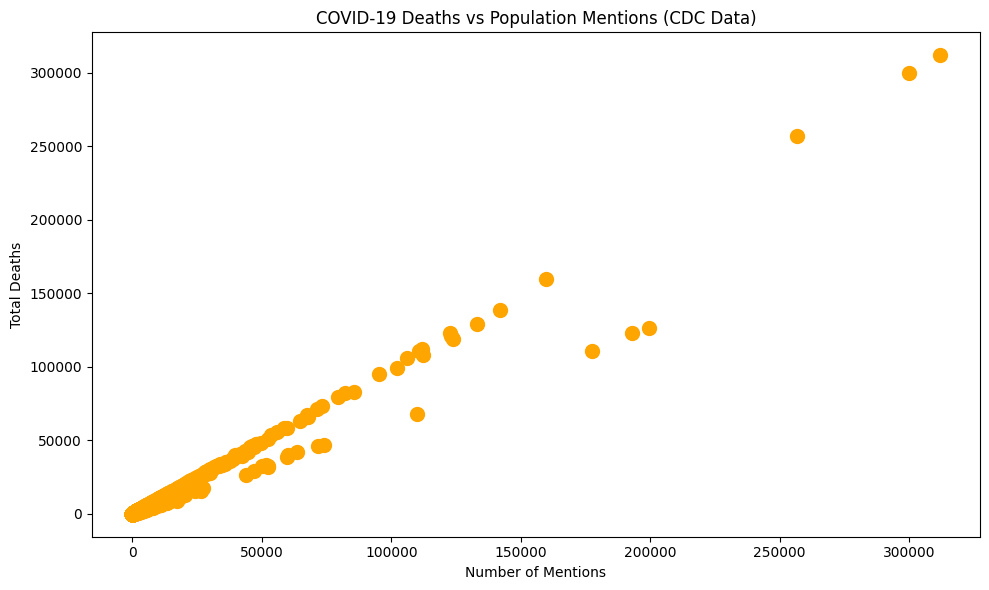

In [11]:

# Visualization 9: COVID-19 Deaths vs Population Mentions (CDC Data)
plt.figure(figsize=(10, 6))
plt.scatter(cdc_data_cleaned["Number of Mentions"], cdc_data_cleaned["COVID-19 Deaths"], color="orange", s=100)
plt.title("COVID-19 Deaths vs Population Mentions (CDC Data)")
plt.xlabel("Number of Mentions")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()


In [15]:
def generate_detailed_report(cdc_agg, chicago_agg):
    # Analyze CDC data for deaths and death rates
    most_affected_group = cdc_agg.loc[cdc_agg["COVID-19 Deaths"].idxmax()]
    highest_death_rate_group = cdc_agg.loc[cdc_agg["Death Rate"].idxmax()]

    # Analyze Chicago data for vaccination rates
    highest_boosted_rate_group = chicago_agg.loc[chicago_agg["Boosted Rate"].idxmax()]
    lowest_boosted_rate_group = chicago_agg.loc[chicago_agg["Boosted Rate"].idxmin()]
    average_boosted_rate = chicago_agg["Boosted Rate"].mean()

    # Generate report
    report = f"""
    ### COVID-19 Data Analysis Report

    #### Objective 1: Identify Age Groups Most Affected by COVID-19
    - The age group most affected by COVID-19 in terms of total deaths is **{most_affected_group['Age Group']}**
      with **{most_affected_group['COVID-19 Deaths']:,} deaths**.
    - The highest death rate (normalized by mentions) is in the **{highest_death_rate_group['Age Group']}** group
      with a rate of **{highest_death_rate_group['Death Rate']:.2f} deaths per mention**.

    #### Objective 2: Understand Age-Related Vulnerabilities
    - The age group with the **highest booster dose rate** is **{highest_boosted_rate_group['Age Group']}** 
      with **{highest_boosted_rate_group['Boosted Rate']:.2f}% coverage**.
    - The age group with the **lowest booster dose rate** is **{lowest_boosted_rate_group['Age Group']}** 
      with **{lowest_boosted_rate_group['Boosted Rate']:.2f}% coverage**.
    - The average booster dose rate across all age groups is **{average_boosted_rate:.2f}%**.

    #### Objective 3: Provide Data-Driven Insights for Public Health Strategies
    1. Older populations (e.g., 65+) exhibit both the highest death rates and the highest booster coverage, highlighting the success of targeted public health interventions.
    2. Younger populations, particularly those under 30, have lower booster coverage, leaving them more vulnerable to severe outcomes.
    3. Public health strategies should prioritize campaigns to improve booster coverage among younger age groups while maintaining efforts to protect older populations.
    4. Regular monitoring of trends, such as death rates and vaccination coverage, is crucial for responding to potential outbreaks and ensuring public health preparedness.

    #### Recommendations:
    1. Increase booster dose uptake among younger populations to improve immunity.
    2. Sustain high vaccination rates among older populations to prevent resurgence in deaths.
    3. Utilize data-driven insights to monitor and respond to public health challenges proactively.
    """

    return report


# Generate the detailed report using cleaned datasets
detailed_report = generate_detailed_report(cdc_agg, chicago_agg)

# Save the detailed report to a text file
detailed_report_path = "./cleaned_result_detailed.txt"
with open(detailed_report_path, "w") as file:
    file.write(detailed_report)

# Confirm the report path
print(f"Report saved to: {detailed_report_path}")


Report saved to: ./cleaned_result_detailed.txt


In [92]:
cdc_data_filtered = cdc_data[~cdc_data["Age Group"].isin(["All Ages", "Not stated"])]
chicago_data_filtered = chicago_data[chicago_data["Age Group"] != "All"]

In [96]:
chicago_data_filtered

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
1,Deaths,2022-07-09,0-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,162642,0.0,0.0,0,0.0,0.0,0,4
2,Cases,2022-11-12,0-4,82.4,5.5,0.0,15.0,0.0,0.0,0.0,...,0.0,0.0,162642,0.0,0.0,134,9.0,0.0,0,4
3,Hospitalizations,2022-08-13,0-4,7.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,162642,0.0,0.0,12,0.0,0.0,0,4
4,Cases,2022-02-26,0-4,54.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,162642,0.0,0.0,88,0.0,0.0,0,4
5,Hospitalizations,2021-12-11,0-4,3.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,162642,0.0,0.0,5,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3748,Deaths,2021-11-13,65-79,8.7,5.5,1.8,1.6,4.8,0.0,0.0,...,0.0,0.0,57295,146087.0,56482.0,5,8.0,1.0,65,79
3749,Cases,2023-09-30,18-29,51.0,17.7,19.8,2.9,2.6,0.0,0.0,...,0.0,0.0,72503,214130.0,161728.0,37,38.0,32.0,18,29
3750,Deaths,2021-10-09,80+,16.4,3.8,0.0,4.3,0.0,0.0,0.0,...,0.0,0.0,30481,52266.0,0.0,5,2.0,0.0,80,200
3751,Deaths,2021-09-25,80+,19.4,1.9,0.0,10.2,0.0,0.0,0.0,...,0.0,0.0,30936,52848.0,0.0,6,1.0,0.0,80,200


In [3]:
print(5 + 2)

7
